# Assignment 3 Digital Filters and and AR Process

In [65]:
# from google.colab import drive
# drive.mount("/content/gdrive", force_remount=True)
!pip install control

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal, linalg
import control as ct

## Question 1: FIR digital filter design. (You can use ‘fir1’ command.)
Design an FIR linear phase, digital filter approximating the ideal frequency response:
\begin{equation}
H_d(ω) =
\begin{cases}
    1, & \text{for } |ω| \leq \frac{\pi}{6} \\
    0, & \text{for } \frac{\pi}{6}\leq |ω| \leq \pi
\end{cases}
\end{equation}






### a) Determine the coefficients of a 25-tap filter based on the window method with rectangular window.

In [67]:
wm = 1/6
b = signal.firwin(25, wm, window='boxcar', pass_zero='lowpass')
print('B Coefficients: ',b)

B Coefficients:  [-7.17778651e-18 -1.59848386e-02 -3.04552078e-02 -3.90740498e-02
 -3.80690098e-02 -2.51190320e-02  7.17778651e-18  3.51666448e-02
  7.61380195e-02  1.17222149e-01  1.52276039e-01  1.75833224e-01
  1.84132122e-01  1.75833224e-01  1.52276039e-01  1.17222149e-01
  7.61380195e-02  3.51666448e-02  7.17778651e-18 -2.51190320e-02
 -3.80690098e-02 -3.90740498e-02 -3.04552078e-02 -1.59848386e-02
 -7.17778651e-18]


In python firwin returns the b coefficients of the FIR filter.
Another way to do it would be to calculate the impulse response of the filter because in the case of an FIR filter the impulse response is the same as the coefficients of the system.

### b) Determine and plot the magnitude and phase response of the filter.

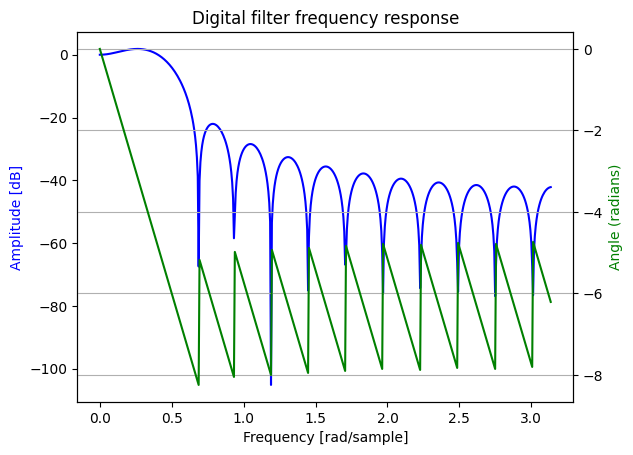

In [68]:
w, h = signal.freqz(b)

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')

ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(True)
ax2.axis('tight')
plt.show()

### c) Repeat parts (a) and (b) using the Hamming window.

[-5.17636518e-19 -1.37862806e-03 -3.88826662e-03 -7.56357843e-03
 -1.06384329e-02 -9.53171003e-03  3.49404650e-18  2.08928717e-02
  5.28489891e-02  9.14334840e-02  1.28810377e-01  1.56021420e-01
  1.65986949e-01  1.56021420e-01  1.28810377e-01  9.14334840e-02
  5.28489891e-02  2.08928717e-02  3.49404650e-18 -9.53171003e-03
 -1.06384329e-02 -7.56357843e-03 -3.88826662e-03 -1.37862806e-03
 -5.17636518e-19]


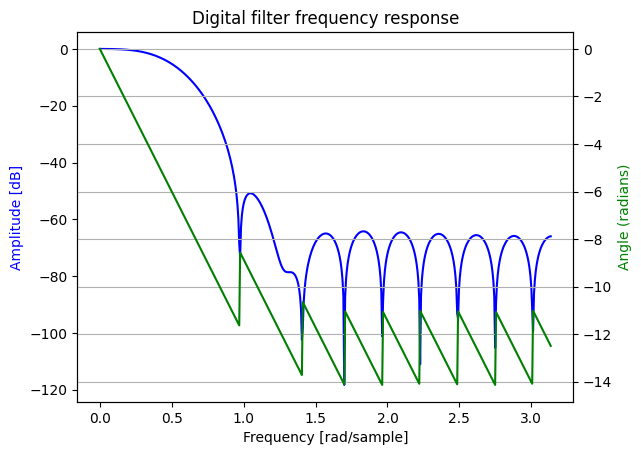

In [69]:
wm = 1/6
b = signal.firwin(25, wm, window='hamming', pass_zero='lowpass')
print(b)
w, h = signal.freqz(b)

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')

ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(True)
ax2.axis('tight')
plt.show()

### d) Repeat parts (a) and (b) using the Barlett window.

[-0.00000000e+00 -1.33206988e-03 -5.07586797e-03 -9.76851246e-03
 -1.26896699e-02 -1.04662633e-02  3.58889325e-18  2.05138762e-02
  5.07586797e-02  8.79166121e-02  1.26896699e-01  1.61180456e-01
  1.84132122e-01  1.61180456e-01  1.26896699e-01  8.79166121e-02
  5.07586797e-02  2.05138762e-02  3.58889325e-18 -1.04662633e-02
 -1.26896699e-02 -9.76851246e-03 -5.07586797e-03 -1.33206988e-03
 -0.00000000e+00]


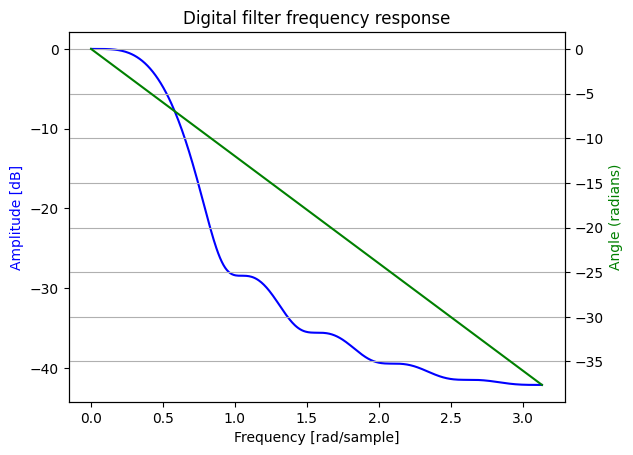

In [70]:
wm = 1/6
b = signal.firwin(25, wm, window='bartlett', pass_zero='lowpass')
print(b)
w, h = signal.freqz(b)

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')

ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(True)
ax2.axis('tight')
plt.show()

## Question 2: FIR filter design using windows


### a) We wish to design an FIR lowpass filter satisfying the specifications:
\begin{equation}
0.98 < H(e^{jω}) < 1.02,\qquad 0 \leq |ω| \leq 0.63\pi \\
-0.15 < H(e^{jω}) < 0.15,\qquad 0.65π \leq |ω| \leq \pi
\end{equation}

by applying a Kaiser window to the impulse response  *h*$_{\text{d}}$[n] for the ideal discrete-time lowpass filter with cutoff ω$_{\text{c}}$ = 0.64π. Find the values of β and M required to satisfy this specification.

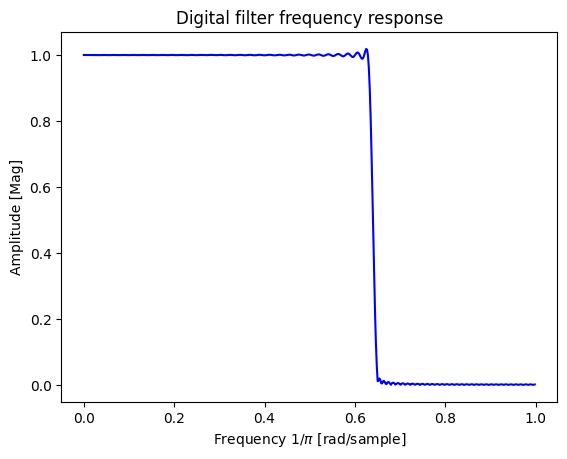


Beta:  2.6524165603361327
M:  183


In [71]:
# cutoff frequency in terms of the sampling frequency, default sampling is 2pi
cutoff = 0.64
# length of the cutoff window, 0.63-0.65
width = 0.02
# maximum ripple allowed in the filter's frequency response in dB. 20*log(A) where A = 0.02
# abs(A(w) - D(w))) < 10**(-ripple/20) where A(w) is actual and D(w) is desired amplitude of response
ripple = -33.98
numtaps, beta = signal.kaiserord(ripple, width)
taps = signal.firwin(numtaps, cutoff, window=('kaiser', beta), scale=False)

w, h = signal.freqz(taps)

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')

ax1.plot(w/np.pi, abs(h), 'b')
ax1.set_ylabel('Amplitude [Mag]')
ax1.set_xlabel('Frequency 1/'r'$\pi$ [rad/sample]')

plt.show()
print("\nBeta: ", beta)
print("M: ", numtaps)


## Question 3: Integer filters

### a) For the filter with the following transfer function, what is the **amplitude response**, **phase response**, and **difference equation**?
\begin{equation}
H(z) = \frac{1-z^{-8}}{1+z^{-2}}
\end{equation}

<ipython-input-72-e68f2549c518>:9: RuntimeWarning: divide by zero encountered in log10
  ax1.plot(w, 20 * np.log10(abs(h)), 'b')


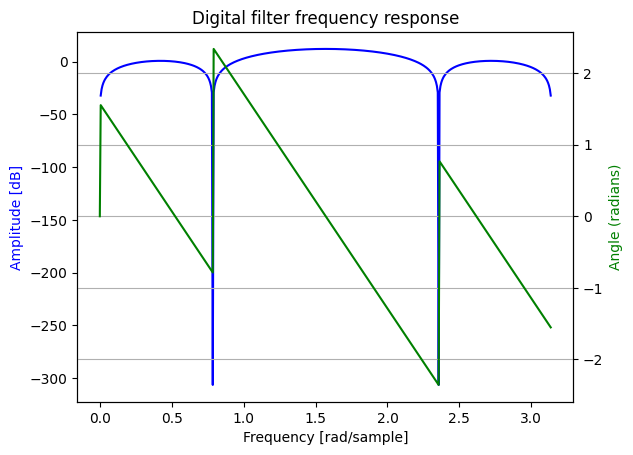

In [72]:
b = [1, 0, 0, 0, 0, 0, 0, 0, -1]
a = [1, 0, 1]

w, h = signal.freqz(b,a)

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')

ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(True)
ax2.axis('tight')
plt.show()


# [h,f] = freqz(b,a)
# freqz(b,a)
# figure
# plot(f/pi,abs(h))
# ylabel('magnitude')
# xlabel('Normalized Frequency (\times \pi rad/sample))')

#### Difference equation:
\begin{align*}
H(z) =\dfrac{Y(z)}{X(z)} &= \dfrac{1-z^{-8}}{1+z^{-2}}\\
\\
(1+z^{-2})Y(z)&=(1-z^{-8})X(z)\\
\\
Y(z) +Y(z)z^{-2}&= X(z) -X(z)z^{-8}\\
\\
y[n]+y[n-2]&=x[n] -x[n-8]\\
\\
y[n]&=x[n] -x[n-8]-y[n-2]\\
\end{align*}

### b) A digital filter has the following transfer function. What traditional **filter type** best describes this filter? Draw its **pole-zero plot**. Calculate its **amplitude response**. What is its **difference equation**?
\begin{equation}
H(z) = \frac{(1-z^{-8})^2}{(1+z^{-2})^2}
\end{equation}


This is a bandpass filter which becomes obvious when you plot the amplitude response without converting to dB.

(array([ 3.54013780e-12+1.00000001j,  3.54013780e-12-1.00000001j,
        -3.53967203e-12+0.99999999j, -3.53967203e-12-0.99999999j,
         0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
         0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
         0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
         0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
         0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
         0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
         0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
         0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ]),
 array([-1.00000000e+00+3.87976472e-09j, -1.00000000e+00-3.87976472e-09j,
        -7.07106787e-01+7.07106786e-01j, -7.07106787e-01-7.07106786e-01j,
        -7.07106775e-01+7.07106777e-01j, -7.07106775e-01-7.07106777e-01j,
        -6.16074063e-09+9.99999999e-01j, -6.16074063e-09-9.99999999e-01j,
         6.16074151e-09+1.00000000e+00j,  

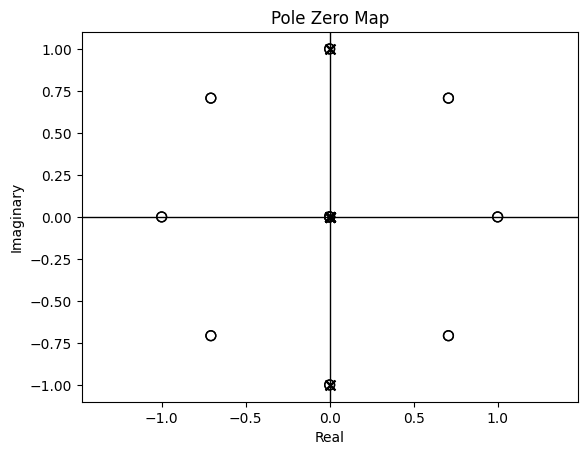

In [73]:
z=ct.TransferFunction.z
H = (1-z**-8)**2/(1+z**-2)**2

ct.pzmap(H, plot=True, grid=False)

/usr/local/lib/python3.10/dist-packages/scipy/signal/_filter_design.py:480: RuntimeWarning: divide by zero encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /
/usr/local/lib/python3.10/dist-packages/scipy/signal/_filter_design.py:480: RuntimeWarning: invalid value encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /


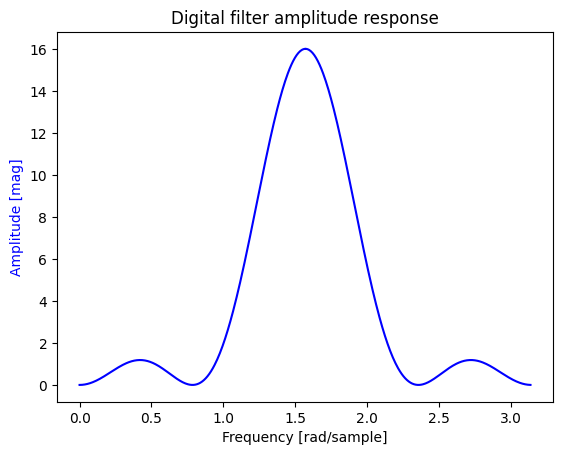

In [74]:
b1 = [1, 0, 0, 0, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 1];
a1 = [1, 0, 2, 0, 1];

w, h = signal.freqz(b1,a1)

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter amplitude response')

ax1.plot(w, abs(h), 'b')
ax1.set_ylabel('Amplitude [mag]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

plt.show()


#### Difference equation:
\begin{align*}
H(z) =\dfrac{Y(z)}{X(z)} &= \frac{(1-z^{-8})^2}{(1+z^{-2})^2} =\frac{(1-2z^{-8}+z^{-16})}{(1+2z^{-2}+z^{-4})} \\
\\
(1+2z^{-2}+z^{-4}) Y(z)&=(1-2z^{-8}+z^{-16})X(z)\\
\\
Y(z) +2Y(z)z^{-2}+Y(z)z^{-4}&= X(z) -2X(z)z^{-8}+X(z)z^{-16}\\
\\
y[n]+2y[n-2]+ y[n-4]&=x[n] -2x[n-8]+x[n-16]\\
\\
y[n]&=x[n] -2x[n-8]+x[n-16]-2y[n-2]-y[n-4]\\
\end{align*}

## Question 4: AR Processes
The power spectrum of an EMG signal typically spans in the range of 20-400Hz. When the muscle fatigues, the spectrum of its EMG signal increases at low frequencies (e.g. below 100 Hz) and decreases at high frequencies. Some researches proposed that they could determine muscle fatigue by calculating and AR(2) model of an EMG signal and looking for changes in the parameters of this model. In the following table are the calculated auto-correlation values for the diaphragm EMG from one subject before and during fatigue of the diaphragm muscle.

\begin{array}{|c|c|} \hline
\text{Lag}    & 0 & 1    & 2    & 3    & 4     & 5     & 6     & 7 \\\hline
\text{Rest}   & 1 & 0.83 & 0.47 & 0.08 & -0.22 & -0.37 & -0.39 & -0.26 \\\hline
\text{Fatigue}& 1 & 0.9  & 0.66 & 0.36 & 0.07  & -0.17 & -0.32 & -0.37\\\hline
\end{array}


### (a) Calculate the AR(4) or AR(3) models of both conditions, then compute the power spectrums correspondingly.
Comment on your results.

Here's some good reading material on yule walker equations :

[Yule-walker](http://www-stat.wharton.upenn.edu/~steele/Courses/956/Resource/YWSourceFiles/YW-Eshel.pdf)

[Toeplitz](https://statisticaloddsandends.wordpress.com/2021/09/25/yule-walker-equations-for-arp-processes-and-toeplitz-matrices/)

But this is what we are working with:

\begin{align*}
∑_{k=0}^{N}a_kγ_{xx}[l-k] &=\begin{cases}
    0, &l>0\\
    σ^2, & l=0
\end{cases}    \\
\begin{bmatrix}
    γ_{xx}[0] & γ_{xx}[-1] & \dots  & γ_{xx}[-N] \\
    γ_{xx}[1] & γ_{xx}[0] & \dots  & γ_{xx}[1-N] \\
    \vdots & \vdots & \ddots & \vdots \\
    γ_{xx}[N] & γ_{xx}[N-1] & \dots  & γ_{xx}[0]
\end{bmatrix}
\begin{bmatrix}
    1  \\
    a_{1}  \\
    \vdots  \\
    a_{N}  
\end{bmatrix}&=
\begin{bmatrix}
    σ^2 \\
    0 \\
    \vdots \\
    0
\end{bmatrix}
\\
\\
\text{For }l > 0 \text{ we have:}\\
∑_{k=1}^{N}a_kγ_{xx}[l-k] &= -γ_{xx}[l]\\
\begin{bmatrix}
    γ_{xx}[0] & γ_{xx}[-1] & \dots  & γ_{xx}[1-N] \\
    γ_{xx}[1] & γ_{xx}[0] & \dots  & γ_{xx}[2-N] \\
    \vdots & \vdots & \ddots & \vdots \\
    γ_{xx}[N-1] & γ_{xx}[N-2] & \dots  & γ_{xx}[0]
\end{bmatrix}
\begin{bmatrix}
    a_{1}  \\
    a_{2}  \\
    \vdots  \\
    a_{N}  
\end{bmatrix}&=
-\begin{bmatrix}
    γ_{xx}[1] \\
    γ_{xx}[2] \\
    \vdots \\
    γ_{xx}[N]
\end{bmatrix}
\\
\\
\text{So in short the thing to know is:}\\
\vec{a} = [γ_{xx}]^{-1}*-\vec{γ_{xx}}
\end{align*}

In [75]:
Rest =    [1, 0.83, 0.47, 0.08, -0.22, -0.37, -0.39, -0.26];
Fatigue = [1, 0.9, 0.66, 0.36, 0.07, -0.17, -0.32, -0.37];

Rest = linalg.toeplitz(Rest);
Fatigue = linalg.toeplitz(Fatigue);

# calculating the AR(3) and AR(4) parameters for each case

a_Rest3 = np.matmul(linalg.inv(Rest[1:4,1:4]),-Rest[1:4,0])
sigma_Rest3 = np.matmul(Rest[0,0:4],np.concatenate([[1],a_Rest3]))

a_Fatigue3 = np.matmul(linalg.inv(Fatigue[1:4,1:4]),-Fatigue[1:4,0])
sigma_Fatigue3 = np.matmul(Fatigue[0,0:4],np.concatenate([[1],a_Fatigue3]))

a_Rest4 = np.matmul(linalg.inv(Rest[1:5,1:5]),-Rest[1:5,0])
sigma_Rest4 = np.matmul(Rest[0,0:5],np.concatenate([[1],a_Rest4]))

a_Fatigue4 = np.matmul(linalg.inv(Fatigue[1:5,1:5]),-Fatigue[1:5,0])
sigma_Fatigue4 = np.matmul(Fatigue[0,0:5],np.concatenate([[1],a_Fatigue4]))

print("AR(3) Parameters: \n")
print("Rest: ")
print("a : ",a_Rest3)
print("\u03C3\u00b2: ", sigma_Rest3)
print("\nFatigue: ")
print("a : ", a_Fatigue3)
print("\u03C3\u00b2 : ", sigma_Fatigue3)
print("\nAR(4) Parameters: \n")
print("Rest: ")
print("a : ",a_Rest4)
print("\u03C3\u00b2 : ", sigma_Rest4)
print("\nFatigue: ")
print("a : ", a_Fatigue4)
print("\u03C3\u00b2 : ", sigma_Fatigue4)


AR(3) Parameters: 

Rest: 
a :  [-1.41145173  0.69848156  0.00364261]
σ²:  0.15707281136168427

Fatigue: 
a :  [-1.69411765  0.96       -0.10588235]
σ² :  0.07077647058823805

AR(4) Parameters: 

Rest: 
a :  [-1.41141447  0.70562516 -0.01079275  0.01022732]
σ² :  0.1570563818477455

Fatigue: 
a :  [-1.69647606  0.98138298 -0.14361702  0.02227394]
σ² :  0.0707413563829773


\begin{align*}
\text{the power spectrum of an AR process is: }\\
S_{xx}(ω) &= σ^{2}_w|H(ω)|^2\\
S_{xx}(ω) &= \frac{σ^{2}_w|b_0^2|}{|1+∑_{k=1}^pa_ke^{-jωk}|^2}\\
\end{align*}

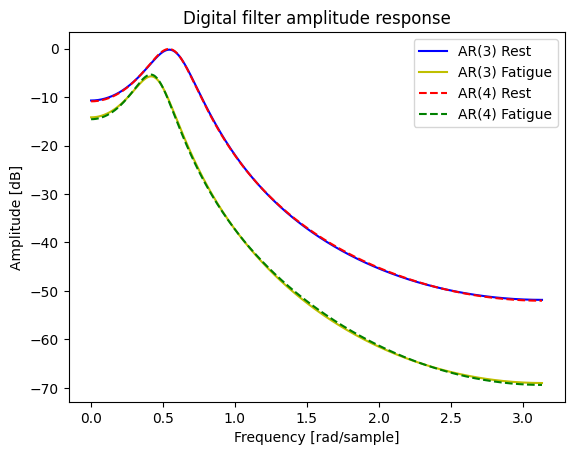

In [76]:
# plotting all the responses on a single plot for comparison
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter amplitude response')
ax1.set_ylabel('Amplitude [dB]')
ax1.set_xlabel('Frequency [rad/sample]')

w, h = signal.freqz(sigma_Rest3,np.concatenate([[1],a_Rest3]))
ax1.plot(w,20*np.log10(abs(h)**2), 'b', label='AR(3) Rest')

w, h = signal.freqz(sigma_Fatigue3,np.concatenate([[1],a_Fatigue3]))
ax1.plot(w,20*np.log10(abs(h)**2), 'y', label='AR(3) Fatigue')

w, h = signal.freqz(sigma_Rest4,np.concatenate([[1],a_Rest4]))
ax1.plot(w,20*np.log10(abs(h)**2), '--r', label='AR(4) Rest')

w, h = signal.freqz(sigma_Fatigue4,np.concatenate([[1],a_Fatigue4]))
ax1.plot(w,20*np.log10(abs(h)**2), '--g', label='AR(4) Fatigue')

ax1.legend()
plt.show()

As shown there isnt a lot of difference bewtween the power spectrums between our AR(3) and AR(4) processes. Although, the magnitudes of our Rest data are much higher than our Fatigue state.


### b) calculate the AR(2) parameters do the changes qualitatively reflect the expected changes in the power spectrum?


AR(2) Parameters: 

Rest: 
a :  [-1.41401479  0.70363227]
σ²:  0.1570748955319834

Fatigue: 
a :  [-1.61052632  0.78947368]
σ² :  0.07157894736842108


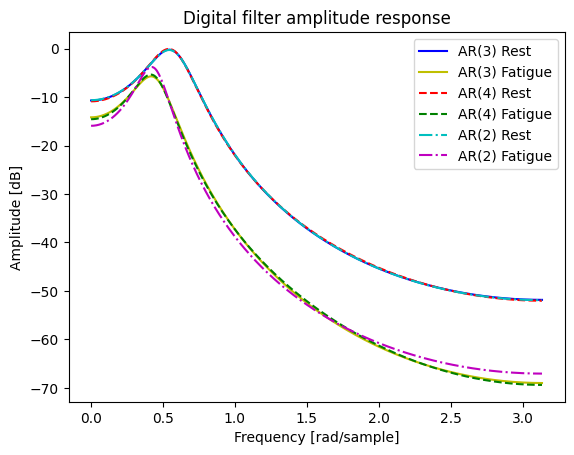

In [77]:
a_Rest2 = np.matmul(linalg.inv(Rest[1:3,1:3]),-Rest[1:3,0])
sigma_Rest2 = np.matmul(Rest[0,0:3],np.concatenate([[1],a_Rest2]))

a_Fatigue2 = np.matmul(linalg.inv(Fatigue[1:3,1:3]),-Fatigue[1:3,0])
sigma_Fatigue2 = np.matmul(Fatigue[0,0:3],np.concatenate([[1],a_Fatigue2]))

print("AR(2) Parameters: \n")
print("Rest: ")
print("a : ",a_Rest2)
print("\u03C3\u00b2: ", sigma_Rest2)
print("\nFatigue: ")
print("a : ", a_Fatigue2)
print("\u03C3\u00b2 : ", sigma_Fatigue2)

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter amplitude response')
ax1.set_ylabel('Amplitude [dB]')
ax1.set_xlabel('Frequency [rad/sample]')

w, h = signal.freqz(sigma_Rest3,np.concatenate([[1],a_Rest3]))
ax1.plot(w,20*np.log10(abs(h)**2), 'b', label='AR(3) Rest')

w, h = signal.freqz(sigma_Fatigue3,np.concatenate([[1],a_Fatigue3]))
ax1.plot(w,20*np.log10(abs(h)**2), 'y', label='AR(3) Fatigue')

w, h = signal.freqz(sigma_Rest4,np.concatenate([[1],a_Rest4]))
ax1.plot(w,20*np.log10(abs(h)**2), '--r', label='AR(4) Rest')

w, h = signal.freqz(sigma_Fatigue4,np.concatenate([[1],a_Fatigue4]))
ax1.plot(w,20*np.log10(abs(h)**2), '--g', label='AR(4) Fatigue')

w, h = signal.freqz(sigma_Rest2,np.concatenate([[1],a_Rest2]))
ax1.plot(w,20*np.log10(abs(h)**2), '-.c', label='AR(2) Rest')

w, h = signal.freqz(sigma_Fatigue2,np.concatenate([[1],a_Fatigue2]))
ax1.plot(w,20*np.log10(abs(h)**2), '-.m', label='AR(2) Fatigue')

ax1.legend()
plt.show()

The Changes between AR(2) and AR(3) & AR(4) arent very dramatic, though you can observe some more clear change in the Fatigue data wherein the AR(2) process has a higher peak in the power spectrum and tends to a higher end.